In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import itertools

# Set display options for better visibility
pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")

# Load the dataset
try:
    df = pd.read_csv('../data/raw/Bitext_Sample_Customer_Service_Training_Dataset.csv')
except FileNotFoundError:
    # Use the original file name if running in the environment where it was uploaded
    df = pd.read_csv('Bitext_Sample_Customer_Service_Training_Dataset.csv')
    
print(f"Dataset loaded with {len(df)} rows and {len(df.columns)} columns.")

Dataset loaded with 6539 rows and 4 columns.


####  Initial Data Inspection

In [ ]:
print("--- First 5 Rows ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Column Info and Data Types ---")
df.info()

print("\n--- Check for Missing Values ---")
print(df.isnull().sum().to_markdown())

--- First 5 Rows ---
| utterance                                              | intent       | category   | tags   |
|:-------------------------------------------------------|:-------------|:-----------|:-------|
| would it be possible to cancel the order I made?       | cancel_order | ORDER      | BIP    |
| cancelling order                                       | cancel_order | ORDER      | BK     |
| I need assistance canceling the last order I have made | cancel_order | ORDER      | B      |
| problem with canceling the order I made                | cancel_order | ORDER      | B      |
| I don't know how to cancel the order I made            | cancel_order | ORDER      | B      |

--- Column Info and Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  6539 non-null   object
 1   intent     6539 non-null   object
 2   cate

C:\Users\bhanu\AppData\Local\Temp\ipykernel_30796\2253964612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_intents.index, y=top_20_intents.values, palette="viridis")


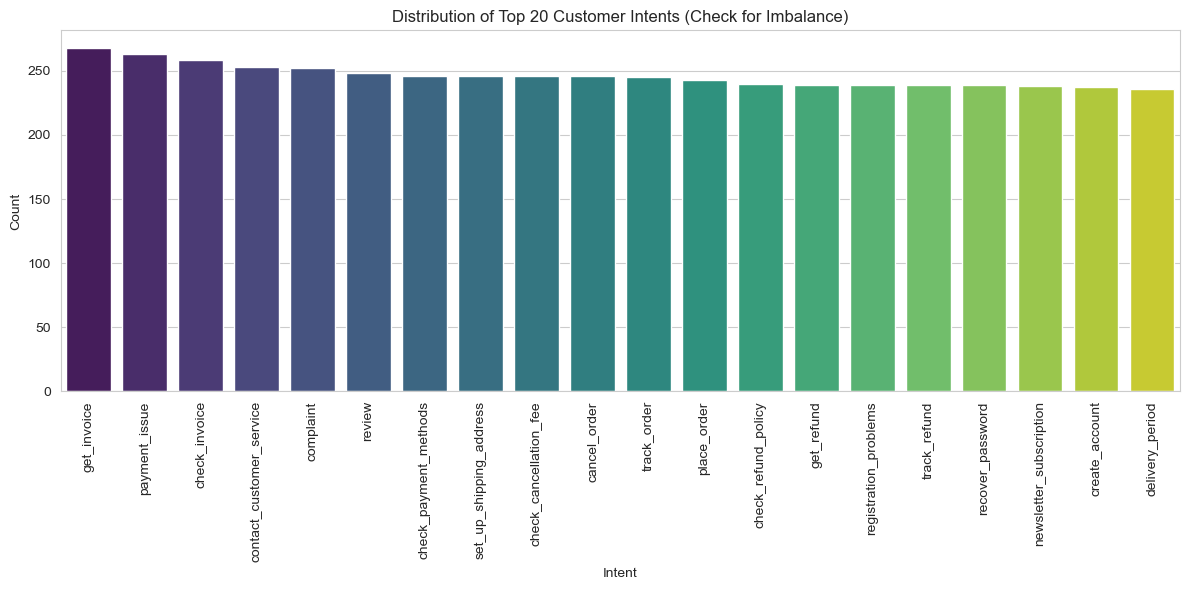

Total Unique Intents: 27
Intent range: Min=225, Max=268


In [4]:
plt.figure(figsize=(12, 6))
intent_counts = df['intent'].value_counts()

# Plot the top 20 intents for readability
top_20_intents = intent_counts.head(20)

sns.barplot(x=top_20_intents.index, y=top_20_intents.values, palette="viridis")
plt.title('Distribution of Top 20 Customer Intents (Check for Imbalance)')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

print(f"Total Unique Intents: {len(intent_counts)}")
print(f"Intent range: Min={intent_counts.min()}, Max={intent_counts.max()}")

In [5]:
# 1. Identify all unique single tags
# Based on prior inspection (B, I, P, M, L, K, E, Q, C, W, Z)
all_tags_list = "".join(df['tags'].dropna().unique())
unique_single_tags = sorted(list(set(char for char in all_tags_list if char.isalpha())))

print(f"Identified Unique Individual Tags: {unique_single_tags}")

# 2. Create new binary (one-hot encoded) columns for each unique tag
tag_columns = [f'tag_{t}' for t in unique_single_tags]

for tag in unique_single_tags:
    # 1 if the tag character is in the 'tags' string, 0 otherwise
    df[f'tag_{tag}'] = df['tags'].apply(lambda x: 1 if tag in str(x) else 0)

# 3. Define the final lists of labels
INTENT_LABELS = sorted(df['intent'].unique().tolist())
TAG_LABELS = tag_columns
ALL_LABELS = INTENT_LABELS + TAG_LABELS

print(f"\nFinal set of {len(ALL_LABELS)} labels generated (27 Intents + 11 Tags).")

# Display the result of the transformation
print("\n--- Transformed DataFrame Head with New Binary Tag Columns ---")
print(df[['utterance', 'intent', 'tags'] + TAG_LABELS].head().to_markdown(index=False, numalign="left", stralign="left"))

Identified Unique Individual Tags: ['B', 'C', 'E', 'I', 'K', 'L', 'M', 'P', 'Q', 'W', 'Z']

Final set of 38 labels generated (27 Intents + 11 Tags).

--- Transformed DataFrame Head with New Binary Tag Columns ---
| utterance                                              | intent       | tags   | tag_B   | tag_C   | tag_E   | tag_I   | tag_K   | tag_L   | tag_M   | tag_P   | tag_Q   | tag_W   | tag_Z   |
|:-------------------------------------------------------|:-------------|:-------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|
| would it be possible to cancel the order I made?       | cancel_order | BIP    | 1       | 0       | 0       | 1       | 0       | 0       | 0       | 1       | 0       | 0       | 0       |
| cancelling order                                       | cancel_order | BK     | 1       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0       |
| I need assist


--- Tag Distribution ---


C:\Users\bhanu\AppData\Local\Temp\ipykernel_30796\99847309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_sums.index, y=tag_sums.values, palette="magma")


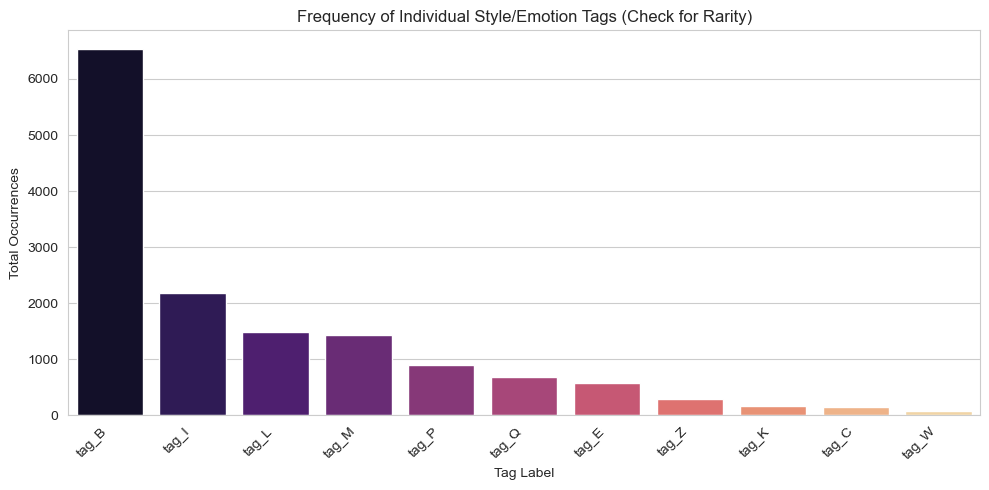


--- Top 10 Most Common Tag Co-occurrences ---
| Tag Pair   | Count   |
|:-----------|:--------|
| B-I        | 2189    |
| B-L        | 1496    |
| B-M        | 1429    |
| B-P        | 906     |
| B-Q        | 679     |
| I-P        | 665     |
| L-Q        | 656     |
| B-E        | 574     |
| I-M        | 482     |
| I-L        | 401     |


In [6]:
print("\n--- Tag Distribution ---")
tag_sums = df[TAG_LABELS].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=tag_sums.index, y=tag_sums.values, palette="magma")
plt.title('Frequency of Individual Style/Emotion Tags (Check for Rarity)')
plt.xlabel('Tag Label')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate Co-occurrence Matrix
tag_co_occurrence = pd.DataFrame(index=TAG_LABELS, columns=TAG_LABELS, data=0)

# Loop through all pairs of tags and count co-occurrences
for col1, col2 in itertools.combinations(TAG_LABELS, 2):
    count = df[(df[col1] == 1) & (df[col2] == 1)].shape[0]
    tag_co_occurrence.loc[col1, col2] = count
    tag_co_occurrence.loc[col2, col1] = count
    
# Add diagonal (self-count)
for tag in TAG_LABELS:
    tag_co_occurrence.loc[tag, tag] = df[tag].sum()

print("\n--- Top 10 Most Common Tag Co-occurrences ---")
# Flatten the upper triangle of the matrix for easier display
co_occurrence_list = []
for i in range(len(TAG_LABELS)):
    for j in range(i + 1, len(TAG_LABELS)):
        tag1 = TAG_LABELS[i].replace('tag_', '')
        tag2 = TAG_LABELS[j].replace('tag_', '')
        count = tag_co_occurrence.iloc[i, j]
        co_occurrence_list.append( (f"{tag1}-{tag2}", count) )

co_occurrence_list.sort(key=lambda x: x[1], reverse=True)
print(pd.DataFrame(co_occurrence_list[:10], columns=['Tag Pair', 'Count']).to_markdown(index=False, numalign="left", stralign="left"))

In [9]:
# Select only the features needed for training
final_columns = ['utterance', 'intent'] + TAG_LABELS
df_processed = df[final_columns].copy()

# For the multi-class INTENT, we still need to one-hot encode it for the multi-task model
# Note: For simplicity in the final output, we will just save the raw Intent column for now,
# and handle the final one-hot encoding for the Multi-Class labels in the 'model_trainer.py' script.

# SAVE the processed data
df_processed.to_csv('../data/processed/processed_data.csv', index=False)
print("\n--- Processed Data Saved ---")
print("File: ../data/processed/processed_data.csv")

# Save the list of all 38 labels for consistent use in the model training and prediction scripts
with open('../src/all_labels.txt', 'w') as f:
    for label in ALL_LABELS:
        f.write(f"{label}\n")



--- Processed Data Saved ---
File: ../data/processed/processed_data.csv
